<a href="https://colab.research.google.com/github/Vayansh/ChatGPT-Paraphrase-Detection/blob/main/ChatGpt_paraphrase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vladimirvorobevv/chatgpt-paraphrases

 97% 58.0M/60.0M [00:03<00:00, 23.2MB/s]
100% 60.0M/60.0M [00:03<00:00, 17.0MB/s]


In [ ]:
!unzip /content/chatgpt-paraphrases.zip

Archive:  /content/chatgpt-paraphrases.zip
  inflating: chatgpt_paraphrases.csv  


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('chatgpt_paraphrases.csv')

In [ ]:
df

,text,paraphrases,category,source
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora
...,...,...,...,...
419192,He wants to see prices brought down across the...,['He desires a reduction in prices across all ...,sentence,cnn_news
419193,"Costs: The Department for Environment, Food an...","['The Department for Environment, Food and Rur...",sentence,cnn_news
419194,Details of the action on water bills are expec...,"[""Downing Street is expected to reveal specifi...",sentence,cnn_news
419195,Chancellor George Osborne signalled the govern...,"[""In a speech last month, Chancellor George Os...",sentence,cnn_news


# **Making Dataset**

In [ ]:
import numpy as np

In [ ]:
df_new = pd.DataFrame({'text': df['text'].iloc[:150000] , 'class' : np.zeros((150000,))})

In [ ]:
import ast
chatgpt_text = []
for i in df['paraphrases'].iloc[:30000]:
  chatgpt_text += ast.literal_eval(i)

In [ ]:
len(chatgpt_text)

150000

In [ ]:
df_chat = pd.DataFrame({'text': chatgpt_text , 'class' : np.ones((len(chatgpt_text),))})

In [ ]:
frame = [df_new,df_chat]
df_actual = pd.concat(frame,ignore_index = True)

In [ ]:
for _ in range(2):
  df_actual = df_actual.sample(frac=1,ignore_index=True)

In [ ]:
df_actual

,text,class
0,Could you suggest some alternative expressions...,1.0
1,What is the maximum number of times you can en...,1.0
2,What is the rationale behind executing prisone...,1.0
3,What are the best methods for making money onl...,1.0
4,What was the reason of extinction of the Indus...,0.0
...,...,...
299995,Is there a difference between public sector jo...,1.0
299996,"What condition is characterized by a firm, pea...",1.0
299997,What is the reason behind men's preference for...,1.0
299998,What is the significance of dreaming about sna...,1.0


In [ ]:
# df_actual.to_csv('human_vs_chatgpt.csv')

In [ ]:
# !zip human_vs_chatgpt.zip /content/human_vs_chatgpt.csv

In [ ]:
# !cp /content/human_vs_chatgpt.zip /content/drive/MyDrive/human_vs_chatgpt.zip

## **Frequency Analysis**

In [ ]:
word_count = dict()
for i in df_new['text']:
  i  = i.split()
  for j in i:
    try:
      word_count[j]+=1
    except:
      word_count[j] = 1

In [ ]:
word_count =[ ]

In [ ]:
keys = list(word_count.keys())
values = np.array(list(word_count.values()))
sorted_value_index = np.argsort(-values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
print(list(sorted_dict.keys())[20:50])

['Is', 'does', 'or', 'some', 'be', 'with', 'that', 'an', 'have', 'Which', 'get', 'from', 'your', 'should', 'if', 'Can', 'at', 'like', 'good', 'between', 'there', 'people', 'as', 'would', 'when', 'about', 'what', 'most', 'will', 'not']


In [ ]:
std = np.std(values[:30])

In [ ]:
mean = np.mean(values[:30])

In [ ]:
mean

14114.4

In [ ]:
std

19617.701867785974

In [ ]:
np.var(values[:30])

384854226.5733333

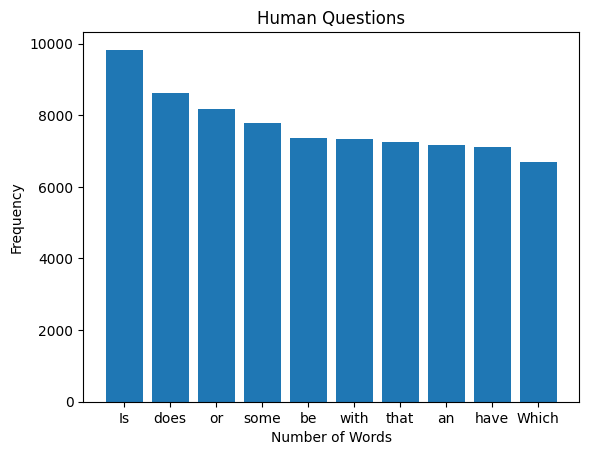

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(sorted_dict.keys())[20:30],(list(sorted_dict.values())[20:30]))
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Human Questions")
plt.savefig('Human_word_frequency_analysis.png')


In [ ]:
word_count2 = dict()
for i in df_chat['text']:
  i  = i.split()
  for j in i:
    try:
      word_count2[j]+=1
    except:
      word_count2[j] = 1

In [ ]:
keys = list(word_count2.keys())
values = np.array(list(word_count2.values()))
sorted_value_index2 = np.argsort(-values)
sorted_dict2 = {keys[i]: values[i] for i in sorted_value_index2}

In [ ]:
std2 = np.std(values)

In [ ]:
std2

792.9257930268717

In [ ]:
np.var(values)

628731.3132472934

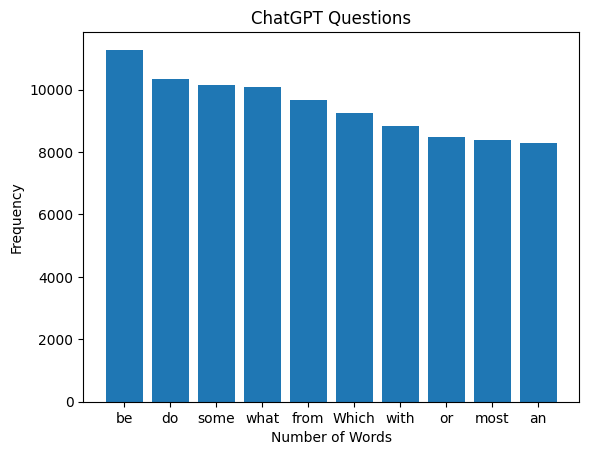

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(sorted_dict2.keys())[20:30],list(sorted_dict2.values())[20:30])
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("ChatGPT Questions")
plt.savefig('ChatGPT_word_frequency_analysis.png')

In [ ]:
word_count3 = dict()
for i in word_count.keys():
  word_count3[i] = [word_count[i]]
for i in word_count2.keys():
  try:
    word_count3[i].append(word_count2[i])
  except:
    word_count3[i] = [word_count2[i]]

In [ ]:
keys3 = list(word_count3.keys())
values3 = np.array(list(word_count3.values()))
sorted_value_index3 = np.argsort(values3)
sorted_dict2 = {keys[i]: values[i] for i in sorted_value_index2}

<ipython-input-39-2e8685822491>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values3 = np.array(list(word_count3.values()))


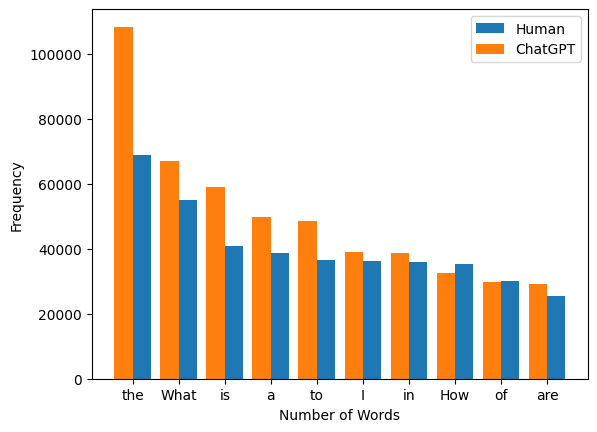

In [ ]:
import matplotlib.pyplot as plt

X_axis = np.arange(10)
plt.bar(X_axis + 0.2,(list(sorted_dict.values())[0:10]),0.4,label = 'Human')
plt.bar(X_axis - 0.2,(list(sorted_dict2.values())[0:10]),0.4, label = 'ChatGPT')

plt.xticks(X_axis,list(sorted_dict.keys())[0:10])
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('ChatGPT_word_frequency_analysis.png')

# **Preprocessing and Splitting**

## **Preprocessing Step**

> Not for Bert



In [ ]:
import re
def convert_to_lower(text):
    text=str(text)
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans(" "," ",string.punctuation))

def remove_extra_white_space(text):
    single_char_pattern = r'\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl = " ", string=text)
    return without_sc

def remove_number(text):
    single_char_pattern = r'\d+'
    without_digit = re.sub(pattern=single_char_pattern, repl = " ", string=text)
    return without_digit

def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]',' ',text)

In [ ]:
# covert to lower letter, numbers, punctuation, non-ascii and extra-white space removeal
import string
df_actual['text'] =  df_actual['text'].apply(lambda x: convert_to_lower(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_punctuation(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_extra_white_space(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_number(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_non_ascii(x))
df_actual.head(10)


,text,class
0,could you suggest some alternative expressions...,1.0
1,what is the maximum number of times you can en...,1.0
2,what is the rationale behind executing prisone...,1.0
3,what are the best methods for making money online,1.0
4,what was the reason of extinction of the indus...,0.0
5,do the personal seat licenses psls for the for...,1.0
6,what does it symbolize to dream about shivling,1.0
7,could you propose some original names for a te...,1.0
8,how long can a person survive on just water wi...,0.0
9,could you define binaural beats,1.0


## **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_actual['text'],df_actual['class'],test_size = 0.2,random_state = 1234)


In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.05,random_state = 1234)

# **Training Machine Learning Models**

## Importing Libraries for Machine learning models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

## **Logistic Regression**

In [ ]:
pipe = Pipeline([

     ('tfidf', TfidfVectorizer()),

     ('lg',LogisticRegression(solver = 'liblinear'))

    ])

# Fitting the model

model1 = pipe.fit(X_train, y_train)

prediction = model1.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))


accuracy: 83.46%
Precision: 83.82%
Recall: 82.84%
F1 Score: 83.33%


In [ ]:
prediction = model1.predict(X_val)

print("accuracy: {}%".format(round(accuracy_score(y_val, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_val, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_val, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_val, prediction)*100,2)))

accuracy: 83.14%
Precision: 83.69%
Recall: 82.37%
F1 Score: 83.03%


**CV+TFIDF+LR**

60000 Rows   ---> 82.19

300000 Rows  

accuracy: 83.56%

Precision: 83.9%

Recall: 83.27%

F1 Score: 83.58%

**TFIDF+LR**

accuracy: 83.46%

Precision: 83.82%

Recall: 82.84%

F1 Score: 83.33%

## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('Scaler',StandardScaler(with_mean = False)),
                ('model', SVC(gamma = 'auto'))])

# Fitting the model

In [ ]:
model1 = pipe.fit(X_train, y_train)

In [ ]:
prediction = model1.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 82.25%
Precision: 81.49%
Recall: 83.61%
F1 Score: 82.54%


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
                ('tfidf', TfidfVectorizer(smooth_idf=True,use_idf=True)),
                ('model', DecisionTreeClassifier(max_depth = 75))])

# Fitting the model

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 77.09%
Precision: 77.43%
Recall: 76.29%
F1 Score: 76.86%


**CV+TFIDF+Decision Tree**

accuracy: 77.09%

Precision: 77.05%

Recall: 77.67%

F1 Score: 77.36%

**TFIDF+Decision Tree**

accuracy: 77.09%

Precision: 77.43%

Recall: 76.29%

F1 Score: 76.86%

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('model', RandomForestClassifier(max_depth=100, random_state=2))])

# Fitting the model

model2 = pipe.fit(X_train, y_train)

prediction = model2.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 81.3%
Precision: 81.19%
Recall: 81.55%
F1 Score: 81.37%


60000 Rows --> 80.2%

300000 Rows --> 81.62

## **XGBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('model', GradientBoostingClassifier(max_depth=100))])


In [ ]:
# Fitting the model
model = pipe.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 80.69%
Precision: 80.29%
Recall: 81.54%
F1 Score: 80.91%


max_depth   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         Accuracy

100      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           75.84  

50      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             78.33


8      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             77.64

3      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             73.72


## **Ensembling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

model_1 = LogisticRegression(solver = 'liblinear')
model_2 = XGBClassifier(max_depth = 50)
model_3 = RandomForestClassifier(max_depth = 75)


pipe = Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('model', VotingClassifier(estimators = [('lr', model_1), ('XGBoost',model_2) , ('rf', model_3)], voting='hard'))])

# Fitting the model

model = pipe.fit(X_train, y_train)


In [ ]:
prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

60000 rows --> 82.65

300000 rows --> 84.86

# **Bert**

In [ ]:
!pip install tensorflow_text==2.13


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout


In [ ]:
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocessing_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
preprocessing_model = hub.KerasLayer(preprocessing_url)
bert_model = hub.KerasLayer(encoder_url)

In [ ]:
from tensorflow.keras.layers import Input ,Dense,Dropout, Conv1D, GlobalMaxPooling1D


In [ ]:
# Neural Network
#bert model
text_input = Input(shape = (),dtype=tf.string,name = 'text')
preprocessed_text = preprocessing_model(text_input)
output = bert_model(preprocessed_text)

# ANN layers
l1 = Conv1D (32,2, name = 'Conv1d_1')(output['sequence_output'])
l1 = Conv1D (64,2,name = 'Conv1d_2')(l1)
l1 = GlobalMaxPooling1D(name = 'global_max_pool_1')(l1)
l1 = Dense(512,name = 'dense_l')(l1)
l1 = Dense(128,name = 'dense_2')(l1)
l1 = Dropout(0.3,name = 'dropout_2')(l1)

l1 = Dense(1,activation = 'sigmoid',name = 'output')(l1)

In [ ]:
model = tf.keras.Model(inputs = [text_input],outputs = [l1])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = Metrics)

## **Training Bert Model**

In [ ]:
from keras.callbacks import ModelCheckpoint


In [ ]:
filepath= "/runs/train/best_bert_ANN_model_full_checkpoint.h5"
checkpoint = ModelCheckpoint(filepath,save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs = 50,batch_size = 50,callbacks = callbacks_list)


## **Loading Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.load_weights('/content/drive/MyDrive/best_bert_ANN_model_full_checkpoint.h5')

## **Acuuracy**

In [ ]:
prediction = np.where(model.predict(X_test)[:,0] > 0.5,1,0)


1875/1875 [==============================] - 638s 336ms/step


In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_test, prediction)*100,2)))

accuracy: 91.99%
Precision: 93.03%
Recall: 90.74%
F1 Score: 91.87%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     30075
         1.0       0.93      0.91      0.92     29925

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



In [ ]:
prediction = np.where(model.predict(X_train)[:,0]>0.5,1,0)
print("accuracy: {}%".format(round(accuracy_score(y_train,prediction)*100,2)))
print("Precision: {}%".format(round(precision_score(y_train, prediction)*100,2)))
print("Recall: {}%".format(round(recall_score(y_train, prediction)*100,2)))
print("F1 Score: {}%".format(round(f1_score(y_train, prediction)*100,2)))

7125/7125 [==============================] - 2374s 332ms/step
accuracy: 92.07%
Precision: 93.13%
Recall: 90.81%
F1 Score: 91.96%


## **Lime**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7030c6b0f66ab11017c95613dec82ee277f45b968beac949800421b52f37f328
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
class Explainer:
  def __init__(self,model):
    self.model = model
    self.explainer = LimeTextExplainer(class_names = ['Human','ChatGPT'])

  def __predict(self,x):
    predictions = self.model.predict(x)
    new_pred = []
    for idx,prediction in enumerate(predictions):
        new_pred.append([1-prediction[0],prediction[0]])
    return np.array(new_pred)

  def explain(self,idxs):
    for idx in idxs:
      print("Data to explain: ", df_actual.text[idx])
      print("True values: ", df_actual['class'].iloc[idx])
      print("Predicted values: ",model.predict([df_actual.text[idx]])[0][0])


      exp = self.explainer.explain_instance(df_actual.text[idx], self.__predict, num_features=10)
      exp.as_list()
      exp.show_in_notebook()

In [ ]:
#42,50,5,14,2004,33,98,48,53,23

In [ ]:
df_actual['text'][98]

'Why would you vote for Trump?'

In [ ]:
exp = Explainer(model)
exp.explain([33])

Data to explain:  What makes bakchod.org such a well-known website?
True values:  1.0
1/1 [==============================] - 3s 3s/step
Predicted values:  0.9573515
157/157 [==============================] - 58s 368ms/step


## **Shap**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
def predict_fn(text):
  # text = emb.transform(text)
  return model.predict(text, verbose = 0)

In [ ]:
masker = shap.maskers.Text(tokenizer=r"\W+")

### Single Instance plot

In [ ]:
explainer = shap.Explainer(predict_fn, masker=masker,output_names = ['ChatGpt_paraphared'])


In [ ]:
shap_values = explainer(df_actual['text'][:10])
shap.text_plot(shap_values)


  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 4/10 [00:45<00:37,  6.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [01:08,  6.87s/it]


In [ ]:
idx=10


In [ ]:
print('True Output is : ',df_actual['class'][:10])
print('Prediction is : ',predict_fn(df_actual['text'][:10]))

True Output is :  0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: class, dtype: float64
Prediction is :  [[9.9984622e-01]
 [9.9998677e-01]
 [9.0558846e-03]
 [8.6099049e-03]
 [6.1142346e-05]
 [8.6223876e-01]
 [9.8688394e-01]
 [1.0072543e-04]
 [9.6967208e-01]
 [9.2371941e-01]]


### Summary Plot

In [ ]:
def summary(shap_values):
  samples  = shap_values.values.shape[0]
  features = []
  for i in range(samples):
    for j in shap_values.data[i]:
      features.append(j)
  num_features = len(features)
  values = np.zeros((samples,num_features))
  dataframe = pd.DataFrame(values,columns = features)
  print(dataframe.shape)
  for i in range(samples):
    for j in range(shap_values.values[i].shape[0]):
      dataframe[shap_values.data[i][j]].iloc[i] += shap_values.values[i][j]

  shap.summary_plot(dataframe.values,features,plot_type = 'bar')

(10, 154)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


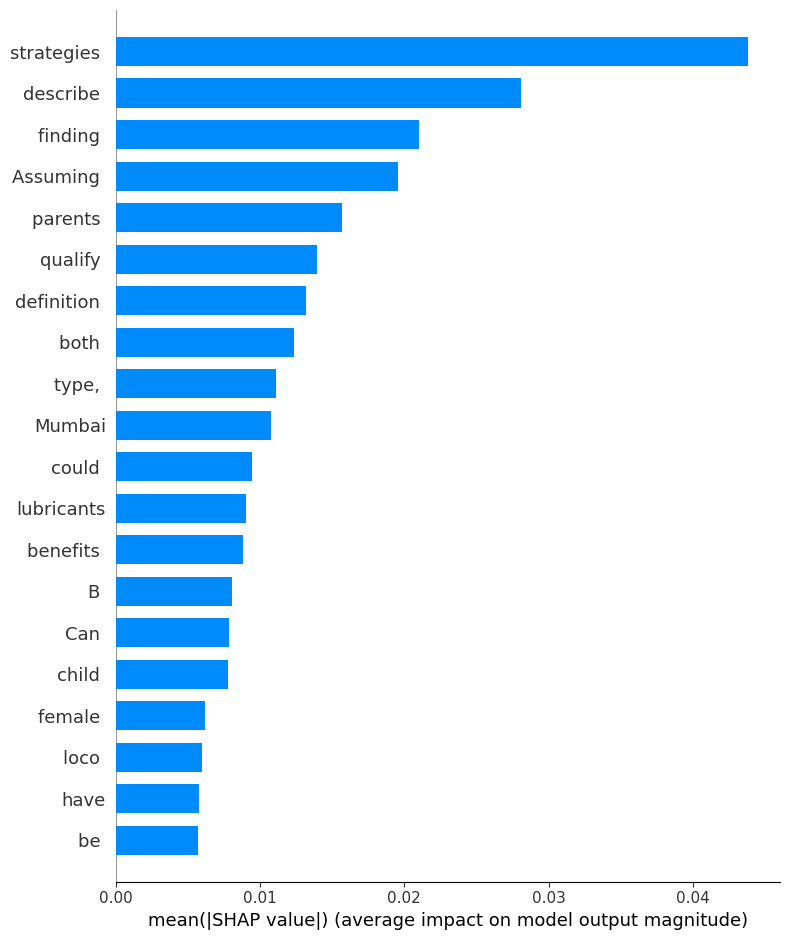

In [ ]:
summary(shap_values)

# BERT+ BIGRU

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout, Bidirectional, GRU


In [ ]:
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocessing_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
preprocessing_model = hub.KerasLayer(preprocessing_url)
bert_model = hub.KerasLayer(encoder_url)

In [ ]:
# Neural Network
#bert model
text_input = Input(shape = (),dtype=tf.string,name = 'text')
preprocessed_text = preprocessing_model(text_input)
output = bert_model(preprocessed_text)

# Hidden Layers
l = Bidirectional(GRU(128),name = 'GRU_1')(output['sequence_output'])
l = Dense(64,name = 'Dense_1')(l)
l = Dense(1,name = 'Output')(l)
model = tf.keras.Model(inputs = [text_input],outputs = [l])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = Metrics)

In [ ]:
from keras.callbacks import ModelCheckpoint


In [ ]:
filepath= "/runs/train/best_bert_Bi_GRU_model_full_checkpoint.h5"
checkpoint = ModelCheckpoint(filepath,save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs = 10,batch_size = 64,callbacks = callbacks_list)


Epoch 1/10
3563/3563 [==============================] - 2874s 804ms/step - loss: 7.6314 - accuracy: 0.4996 - precision: 0.4996 - recall: 1.0000 - val_loss: 7.5674 - val_accuracy: 0.5038 - val_precision: 0.5038 - val_recall: 1.0000
Epoch 2/10
1006/3563 [=======>......................] - ETA: 32:31 - loss: 7.6075 - accuracy: 0.5011 - precision: 0.5011 - recall: 1.0000

KeyboardInterrupt: ignored

# **FastText**

In [ ]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=e04cad7bc3e047946b0668aae1e33abcbcdd89829f4343e34c3175f238a43db4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
import numpy as np
df_actual = pd.DataFrame({'text':df['text'].iloc[:150000],'class': '__label__human'})
df_actual2 = pd.DataFrame({'text':chatgpt_text,'class':'__label__gpt'})
frame = [df_actual,df_actual2]
df_actual = pd.concat(frame,ignore_index = True)

In [ ]:
for _ in range(2):
  df_actual = df_actual.sample(frac = 1,ignore_index= True)

In [ ]:
import re
def convert_to_lower(text):
    text=str(text)
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans(" "," ",string.punctuation))

def remove_extra_white_space(text):
    single_char_pattern = r'\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl = " ", string=text)
    return without_sc

def remove_number(text):
    single_char_pattern = r'\d+'
    without_digit = re.sub(pattern=single_char_pattern, repl = " ", string=text)
    return without_digit

def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]',' ',text)

In [ ]:
# covert to lower letter, numbers, punctuation, non-ascii and extra-white space removeal
import string
df_actual['text'] =  df_actual['text'].apply(lambda x: convert_to_lower(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_punctuation(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_extra_white_space(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_number(x))
df_actual['text'] = df_actual['text'].apply(lambda x: remove_non_ascii(x))
df_actual.head(10)


,text,class
0,where is it possible to obtain marijuana in bh...,__label__gpt
1,okay google i need your help please can anyone...,__label__human
2,does investing really make you rich,__label__human
3,what will be the resolution one should have fo...,__label__human
4,whats the reason behind the absence of an upvo...,__label__gpt
5,which are the best open source projects one sh...,__label__human
6,how can hollow columns be employed in various ...,__label__gpt
7,how do i make a website like jumprit,__label__human
8,what is the process of learning to scrape web ...,__label__gpt
9,what are some ways for a naturistnudist family...,__label__gpt


In [ ]:
df_actual['class_data'] = df_actual['class'] + ' ' + df_actual['text']


In [ ]:
df_actual

,text,class,class_data
0,where is it possible to obtain marijuana in bh...,__label__gpt,__label__gpt where is it possible to obtain ma...
1,okay google i need your help please can anyone...,__label__human,__label__human okay google i need your help pl...
2,does investing really make you rich,__label__human,__label__human does investing really make you ...
3,what will be the resolution one should have fo...,__label__human,__label__human what will be the resolution one...
4,whats the reason behind the absence of an upvo...,__label__gpt,__label__gpt whats the reason behind the absen...
...,...,...,...
299995,should a startup fire an underperforming intern,__label__human,__label__human should a startup fire an underp...
299996,in what ways are hardware firewalls distinct f...,__label__gpt,__label__gpt in what ways are hardware firewal...
299997,what steps can i take to stay awake in class,__label__gpt,__label__gpt what steps can i take to stay awa...
299998,what steps can i take to find a boyfriend,__label__gpt,__label__gpt what steps can i take to find a b...


In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df_actual['class_data'],test_size = 0.2,random_state = 1234)


In [ ]:
train_df.to_csv('df.train',index = False,header = False)


In [ ]:
test_df.to_csv('df.test',index = False,header = False)


In [ ]:
import fasttext

In [ ]:
model = fasttext.train_supervised(input = 'df.train')


In [ ]:
X_test = []
y_test = []
for i in test_df:
  X_test.append(' '.join(i.split()[1:]))
  if i.split()[0] == '__label__human':
    y_test.append(0)
  else:
    y_test.append(1)

In [ ]:
predictions = []
for i in X_test:
  pre = model.predict(i)
  if(pre[0][0] == '__label__human'):
    predictions.append(0)
  else:
    predictions.append(1)

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))
print("Precision: {}%".format(round(precision_score(y_test, predictions)*100,2)))
print("Recall: {}%".format(round(recall_score(y_test, predictions)*100,2)))
print("F1_score: {}%".format(round(f1_score(y_test, predictions)*100,2)))

accuracy: 83.77%
Precision: 83.53%
Recall: 84.02%
F1_score: 83.77%


In [ ]:
model.predict(df_actual['text'][0])

(('__label__gpt',), array([0.98892337]))

In [ ]:
model.predict(df_actual['text'][50])

(('__label__gpt',), array([0.72340143]))

In [ ]:
df_actual['class'][50]

'__label__gpt'

# **Glove**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/glove.6B.zip'


Archive:  /content/drive/MyDrive/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       

In [ ]:
f = open("glove.6B.100d.txt",encoding="utf8")

embeddings_index = {}
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype = np.float32)
  embeddings_index[word] = coefs
f.close()


In [ ]:
class glove_emb:
  def __init__(self,embeddings_dim = 100,max_words = 150):
    self.embeddings_dim = embeddings_dim
    self.max_words = max_words


  def fit(self,x,y):
    return self


  def transform(self,x):
    if type(x) == str:
      embeddings_matrix = np.zeros((self.max_words,self.embeddings_dim))
      if len(x.split()) > self.max_words:
        for i in range(self.max_words):
          try:
            embeddings_matrix[i] = embeddings_index[x.split()[i]]
          except:
            continue
      else:
        for i in range(len(x.split())):
          try:
            embeddings_matrix[i] = embeddings_index[x.split()[i]]
          except:
            continue
      return embeddings_matrix
    else:
      embeddings = []
      for sent in x:
        embeddings_matrix = np.zeros((self.max_words,self.embeddings_dim))
        if len(sent.split()) > self.max_words:
          for i in range(self.max_words):
            try:
              embeddings_matrix[i] = embeddings_index[sent.split()[i]]
            except:
              continue
        else:
          for i in range(len(sent.split())):
            try:
              embeddings_matrix[i] = embeddings_index[sent.split()[i]]
            except:
              continue
        embeddings.append(embeddings_matrix)
      return np.array(embeddings)

In [ ]:
emb = glove_emb()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv1D , GlobalMaxPooling1D
from keras.models import  Sequential

In [ ]:
# input = Input(shape = (150,100),name = 'Input')

# l = Conv1D (32,2,name = 'Conv1d_1')(input)
# l = Conv1D (64,2,name = 'Conv1d_2')(l)
# l = GlobalMaxPooling1D(name = 'max_pool_1')(l)
# l = Dense(512,name = 'dense_l')(l)
# l = Dropout(0.6,name = 'dropout_1')(l)
# l = Dense(256,name = 'dense_2')(l)
# l = Dropout(0.8,name = 'dropout_2')(l)
# l = Dense(128,name = 'hidden_l_2')(l)
#     # l = Dropout(0.3,name = 'drop_4')(l)
# l = Dense(64,name = 'hidden_l_3')(l)
# l = Dense(1,activation = 'sigmoid',name = 'output')(l)

# model = tf.keras.Model(inputs = [input],outputs = [l])

# # model = tf.keras.Model(inputs = [text_input],outputs = [l])

input = Input(shape = (150,100),name = 'Input')

l = Conv1D (32,2,name = 'Conv1d_1')(input)
l = Conv1D (64,2,name = 'Conv1d_2')(l)
l = GlobalMaxPooling1D(name = 'max_pool_1')(l)
l = Dense(512,name = 'dense_l')(l)
l = Dense(256,name = 'dense_2')(l)
l = Dropout(0.3,name = 'dropout_2')(l)
    # l = Dense(9,name = 'hidden_l_2')(l)
    # l = Dropout(0.3,name = 'drop_4')(l)

l = Dense(1,activation = 'sigmoid',name = 'output')(l)

model = tf.keras.Model(inputs = [input],outputs = [l])

print(model.summary())

# print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 150, 100)]        0         
                                                                 
 Conv1d_1 (Conv1D)           (None, 149, 32)           6432      
                                                                 
 Conv1d_2 (Conv1D)           (None, 148, 64)           4160      
                                                                 
 max_pool_1 (GlobalMaxPooli  (None, 64)                0         
 ng1D)                                                           
                                                                 
 dense_l (Dense)             (None, 512)               33280     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                           

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = Metrics)

In [ ]:
import keras

In [ ]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data, labels, batch_size=32, dim=(150,), n_channels= 100,
                  shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.data = data
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        data_temp = [self.data[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(data_temp,indexes)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.data))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, data_temp,indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = emb.transform(data_temp)
        y = np.array([[i] for i in self.labels[indexes]])

        return X, y

In [ ]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True,inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True,inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True,inplace = True)

In [ ]:
train_gen = DataGenerator(X_train,y_train)

In [ ]:
val_gen = DataGenerator(X_val,y_val)

In [ ]:
test_gen = DataGenerator(X_test,y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
filepath= "/content/runs/train/best_glove_ANN_model_full_checkpoint.h5"
checkpoint = ModelCheckpoint(filepath,save_best_only=True)
callbacks_list = [checkpoint]

In [ ]:
model.fit(train_gen,validation_data=(val_gen), epochs = 50,batch_size = 50,callbacks = callbacks_list)


Epoch 1/50
7125/7125 [==============================] - 71s 10ms/step - loss: 0.4924 - accuracy: 0.7696 - precision: 0.7751 - recall: 0.7589 - val_loss: 0.4460 - val_accuracy: 0.7955 - val_precision: 0.8519 - val_recall: 0.7242
Epoch 2/50
7125/7125 [==============================] - 105s 15ms/step - loss: 0.4403 - accuracy: 0.8029 - precision: 0.8087 - recall: 0.7930 - val_loss: 0.4221 - val_accuracy: 0.8080 - val_precision: 0.8368 - val_recall: 0.7738
Epoch 3/50
7125/7125 [==============================] - 72s 10ms/step - loss: 0.4262 - accuracy: 0.8122 - precision: 0.8188 - recall: 0.8014 - val_loss: 0.4511 - val_accuracy: 0.8000 - val_precision: 0.8688 - val_recall: 0.7152
Epoch 4/50
7125/7125 [==============================] - 77s 11ms/step - loss: 0.4184 - accuracy: 0.8159 - precision: 0.8224 - recall: 0.8053 - val_loss: 0.4526 - val_accuracy: 0.8079 - val_precision: 0.8618 - val_recall: 0.7417
Epoch 5/50
7125/7125 [==============================] - 71s 10ms/step - loss: 0.4116 - 

In [ ]:
model.load_weights("/content/drive/MyDrive/best_glove_ANN_model_full_checkpoint.h5")

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
y_pred = model.predict(test_gen[0][0],verbose = 0).flatten()
y_true = test_gen[0][1].flatten()
for i in tqdm(range(1,1875)):
  y_pred = np.append(y_pred,model.predict(test_gen[i][0],verbose = 0).flatten())
  y_true = np.append(y_true,test_gen[i][1].flatten())

y_pred = np.where(y_pred>0.5,1,0)
print("accuracy: {}%".format(round(accuracy_score(y_true, y_pred)*100,2)))
print("Precision: {}%".format(round(precision_score(y_true, y_pred)*100,2)))
print("Recall: {}%".format(round(recall_score(y_true, y_pred)*100,2)))
print("F1_score: {}%".format(round(f1_score(y_true, y_pred)*100,2)))



100%|██████████| 1874/1874 [02:24<00:00, 12.98it/s]


accuracy: 84.9%
Precision: 84.03%
Recall: 86.07%
F1_score: 85.04%


In [ ]:
y_pred = model.predict(train_gen[0][0],verbose = 0).flatten()
y_true = train_gen[0][1].flatten()
for i in tqdm(range(1,1875)):
  y_pred = np.append(y_pred,model.predict(train_gen[i][0],verbose = 0).flatten())
  y_true = np.append(y_true,train_gen[i][1].flatten())

y_pred = np.where(y_pred>0.5,1,0)
print("accuracy: {}%".format(round(accuracy_score(y_true, y_pred)*100,2)))
print("Precision: {}%".format(round(precision_score(y_true, y_pred)*100,2)))
print("Recall: {}%".format(round(recall_score(y_true, y_pred)*100,2)))
print("F1_score: {}%".format(round(f1_score(y_true, y_pred)*100,2)))

# **Distill bert**

In [ ]:
!unzip /content/drive/MyDrive/human_vs_chatgpt.zip

Archive:  /content/drive/MyDrive/human_vs_chatgpt.zip
  inflating: content/human_vs_chatgpt.csv  


In [ ]:
df = pd.read_csv('content/human_vs_chatgpt.csv')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['class'],test_size = 0.2,random_state = 1234)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state = 1234)

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
import tensorflow as tf


In [ ]:
train_encodings = tokenizer(list(X_train.values),
                            truncation=True,
                            padding=True)
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                    list(y_train.values)))

In [ ]:
val_encodings = tokenizer(list(X_val.values),
                            truncation=True,
                            padding=True)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings),
                                    list(y_val.values)))

In [ ]:
BATCH_SIZE = 64
N_EPOCHS = 5

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
#chose the optimizer
optimizerr = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function
losss = tf.keras.losses.BinaryCrossentropy()
#build the model
model.compile(optimizer=optimizerr,
              loss= losss,
              metrics=['accuracy'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
filepath= "/content/runs/train/best_distil_bert_full_checkpoint.h5"
checkpoint = ModelCheckpoint(filepath,save_best_only=True, save_weights_only=True)
callbacks_list = [checkpoint]

In [ ]:
# train the model
model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE), validation_data= val_dataset.shuffle(len(X_val)).batch(BATCH_SIZE),
          epochs=N_EPOCHS,
          batch_size=BATCH_SIZE, callbacks = callbacks_list)

Epoch 1/5
675/675 [==============================] - 412s 603ms/step - loss: 0.4584 - accuracy: 0.4519 - val_loss: 0.4893 - val_accuracy: 0.4844
Epoch 2/5
 22/675 [..............................] - ETA: 6:06 - loss: 0.4142 - accuracy: 0.3303

KeyboardInterrupt: ignored

In [ ]:
model.save_weights('distil_bert.h5')

In [ ]:
X_test.reset_index(drop =True,inplace = True)

In [ ]:
X_test[0]

'Is tolerance or patience more prevalent among individuals?'

In [ ]:
model.predict(X_test[0])

IndexError: ignored

# GPT_2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,hamming_loss, f1_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00


In [ ]:
from transformers import GPT2Tokenizer, TFGPT2Model


In [ ]:
class embeddings:
  def __init__(self,max_words,encoding_length):
    self.max_w = max_words
    self.max_encoding = encoding_length
    self.tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    self.emb_model = TFGPT2Model.from_pretrained('gpt2')
    self.model = LogisticRegression(solver = 'sag')

  def encodings(self,X_train):
    embeddings = np.zeros((X_train.shape[0],self.max_encoding))

    for i,sent in enumerate(X_train):   # for each row or comments
      if len(sent.split()) > self.max_w:
        sent = ' '.join(sent.split()[:self.max_w])
        output = self.tokenizer(sent, return_tensors='tf')
        output = self.emb_model(output)
        v = np.array([np.sum(i) for i in output.last_hidden_state[0]])
        k = np.sqrt(np.sum(v)**2)
        if k == 0:
          for j in range(min(self.max_encoding,len(v))):
            embeddings[i][j] = v[j]
        else:
          v = v/k
          for j in range(min(self.max_encoding,len(v))):
            embeddings[i][j] = v[j]

      else:
        output = self.tokenizer(sent,return_tensors = 'tf')
        output = self.emb_model(output)
        v = np.array([np.sum(i) for i in output.last_hidden_state[0]])
        k = np.sqrt(np.sum(v)**2)
        if k == 0:
          for j in range(min(self.max_encoding,len(v))):
            embeddings[i][j] = v[j]
        else:
          v = v/k
          for j in range(min(self.max_encoding,len(v))):
            embeddings[i][j] = v[j]
    return embeddings

  def fit(self,X_train,y_train):
    X_train = self.encodings(X_train)
    self.model.fit(X_train,y_train)

  def predict(self,X_test):
    X_test = self.encodings(X_test)
    return self.model.predict(X_test)

  def predict_proba(self,X_test):
    X_test = self.encodings(X_test)
    return self.model.predict_proba(X_test)

  def metrics(self,y_actual,y_pred):
    print("hamming loss = {}".format(hamming_loss(y_actual, y_pred)))
    print("accuracy score = {}".format(accuracy_score(y_actual, y_pred)))

    print([f1_score(y_actual.iloc[:,count],y_pred[:,count], average='weighted') for count in range(len(categories))])
    print([accuracy_score(y_actual.iloc[:,count],y_pred[:,count]) for count in range(len(categories))])
    print([precision_score(y_actual.iloc[:,count],y_pred[:,count]) for count in range(len(categories))])
    print([recall_score(y_actual.iloc[:,count],y_pred[:,count]) for count in range(len(categories))])



In [ ]:
emb = embeddings(64,125)


All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [ ]:
emb.fit(X_train,y_train)


# Ensembling of Bert, CV+tfidf+LR , CV+tfidf+Random_forest

In [ ]:
model2.predict_proba(X_test[:2])[:,1]

array([0.36331782, 0.74923865])

In [ ]:
#CV+tfidf+LR --> model1
#CV+tfidf+random_forest --> model2
#BERT + ANN --> model


def predict(X_test):
  bert_predictions = model.predict(X_test)[:,0]
  LR_predictions = model1.predict_proba(X_test)[:,1]
  rf_predictions = model2.predict_proba(X_test)[:,1]
  return np.where((bert_predictions+LR_predictions+rf_predictions)/3 > 0.5,1,0)


In [ ]:
def predict_proba(X_test):
  bert_predictions = model.predict(X_test,verbose = 0)[:,0]
  LR_predictions = model1.predict_proba(X_test)[:,1]
  rf_predictions = model2.predict_proba(X_test)[:,1]
  predict_prob = (bert_predictions+LR_predictions+rf_predictions)/3
  return np.array([1-predict_prob,predict_prob])

In [ ]:
predictions = predict(X_test)

1875/1875 [==============================] - 614s 327ms/step
(60000,) (60000,) (60000,)


In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 91.35%


## Lime

In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
class Explainer:
  def __init__(self,model):
    self.model = model
    self.explainer = LimeTextExplainer(class_names = ['Human','ChatGPT'])

  # def __predict(self,x):
  #   predictions = self.model.predict(x)
  #   new_pred = []
  #   for idx,prediction in enumerate(predictions):
  #       new_pred.append([1-prediction[0],prediction[0]])
  #   return np.array(new_pred)

  def explain(self,idxs):
    for idx in idxs:
      print("Data to explain: ", df_actual.text[idx])
      print("True values: ", df_actual['class'].iloc[idx])
      print("Predicted values: ",predict([df_actual.text[idx]])[0][0])


      exp = self.explainer.explain_instance(df_actual.text[idx], predict_proba, num_features=10)
      exp.as_list()
      exp.show_in_notebook()

## Shap

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
def predict_fn(text):
  bert_predictions = model.predict(X_test)[:,0]
  LR_predictions = model1.predict_proba(X_test)[:,1]
  rf_predictions = model2.predict_proba(X_test)[:,1]
  return (bert_predictions+LR_predictions+rf_predictions)/3

In [ ]:
masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(predict_fn, masker=masker,output_names = ['ChatGpt_paraphared'])

In [ ]:
print('True Output is : ',df_actual['class'][idx])
print('Prediction is : ',predict_fn([df_actual['text'][idx]]))